# 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查 shape (有多少 rows, features，label 是甚麼型態)
    - pd.read_csv
    - np.loadtxt
    - sklearn.datasets.load_xxx
    - data.shape (data need to be numpy array or pandas)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 lable (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# read iris data
iris = load_iris()

In [ ]:
# check the data shape
print(iris.data.shape, iris.target.shape)

(150, 4) (150,)


In [ ]:
random_seed = 5  # set seed for same train test data split
x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=random_seed)

In [ ]:
print("shape of X_train: ", x_train.shape)

shape of X_train:  (112, 4)


In [ ]:
print("shape of X_test: ", x_test.shape)

shape of X_test:  (38, 4)


In [ ]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7)

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
clf.feature_importances_

array([0., 0., 0., 1.])

### visualize our tree

In [ ]:
!pip install graphviz

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

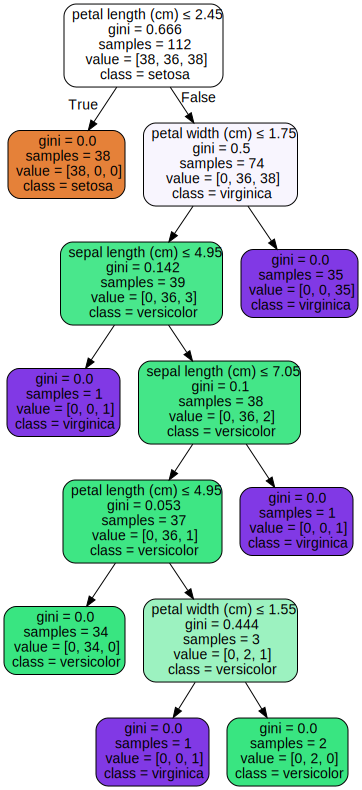

In [ ]:
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph